---
### Projectr : 하루시작 지하철 혼잡도 머신러닝 
### Description : 
    
### Author : Forrest Dpark
### Date : 2024.06.04+ ~
### Detail : 
### Update: 
    - 2024.06.04 by pdg : 머신러닝을 위한 데이터 셋 만들기 
        * 일부 정제용 함수 수정 
        * 칼럼 순서를 재벼열하는 함수를 만듬. 
        * 7호선 만  지하철 배차 정보 있는 상태 -> 승하차 데이터에서 7호선만 추출 
        * 배차 날짜별 분포 시각화
        * 승하차 데이터에서 날짜 정보  정제
    - 2024.06.05 by pdg, snr, pjh pair coding : 정제 완료된 최종 데이터 셋으로 모델학습
        * 모델 학습을 위해 승하차로 나누누어 데이터 저장 
        * 승차 -> mlTable_승차.csv, 하차 -> mlTable_하차.csv 로 저장함.
    - 2024.06.09 by pdg :  station inf data 문제점을 해결한뒤 다시 머신러닝 돌림 
    
---

In [1]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
from Functions import Service 
Service.plotSetting()


___## OS platform 한글 세팅완료 ## ___


In [2]:
# Data loading 
subwayInfo = pd.read_csv("../Data/StationInfo.csv")
subwayInfo.head()

,역사코드,역명,호선,환승역수
0,150,서울역,1,2
1,426,서울역,4,2
2,151,시청,1,2
3,201,시청,2,2
4,152,종각,1,1


In [3]:
latlng = pd.read_csv("../Data/seoul_subway_latlon_zenzen.csv")
latlng.rename( {'고유역번호(외부역코드)':'역사코드'}, inplace=True, axis=1)
latlng.drop(['역명','호선','환승역수'], axis=1,inplace=True)
latlng.head()


,역사코드,latitude,longitude
0,150,37.554679,126.970607
1,426,37.554679,126.970607
2,151,37.565345,126.977198
3,201,37.565345,126.977198
4,152,37.570228,126.983151


In [4]:
test = pd.merge(subwayInfo,latlng, on='역사코드',how='inner' )
test ## 279개 확인 


,역사코드,역명,호선,환승역수,latitude,longitude
0,150,서울역,1,2,37.554679,126.970607
1,426,서울역,4,2,37.554679,126.970607
2,151,시청,1,2,37.565345,126.977198
3,201,시청,2,2,37.565345,126.977198
4,152,종각,1,1,37.570228,126.983151
...,...,...,...,...,...,...
274,2649,신내,6,1,37.612491,127.104271
275,2758,상동,7,1,37.505789,126.753192
276,2761,부평구청,7,1,37.507434,126.721440
277,2753,까치울,7,1,37.506227,126.811340


In [5]:
# 7호선 배차 시간 데이터
interval = pd.read_csv('../Data/지하철배차시간데이터/interval.csv')
Service.dataInfoProcessing(
    df=interval,
    PrintOutColnumber=5
    )




1. Data row/colum numbers : 106/22

2. null ceck 결과 Null 없는 clean data!

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[역사코드(int64)]: 			53/106 [uniq/raw]
	1.[주중주말(object)]: 			2/106 [uniq/raw]
	2.[05(float64)]: 			6/106 [uniq/raw]
	3.[06(float64)]: 			12/106 [uniq/raw]
	4.[07(float64)]: 			14/106 [uniq/raw]
	 ...etc (추가로 17개의 칼럼이 있습니다 )


,역사코드,주중주말,05,06,07,08,09,10,11,12,...,15,16,17,18,19,20,21,22,23,24
0,2711,DAY,1.5,4.5,5.0,6.0,5.5,5.0,5.0,5.0,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
1,2711,SAT,1.5,3.5,3.5,3.5,3.0,4.0,4.5,4.0,...,3.0,3.5,4.0,4.5,3.5,3.5,4.0,3.5,3.5,0.0
2,2712,DAY,2.5,7.5,14.0,15.5,14.5,12.0,10.0,10.0,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
3,2712,SAT,2.5,6.5,9.0,9.5,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0
4,2713,DAY,3.0,7.5,13.5,15.5,15.5,12.0,10.0,10.0,...,10.0,10.0,12.0,14.0,14.0,12.0,9.0,8.5,6.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2761,SAT,2.0,5.5,5.5,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,4.5,6.0,5.5,4.5,0.5
102,3762,DAY,2.5,6.0,8.0,10.0,8.0,6.0,5.0,5.0,...,5.0,5.5,5.0,8.5,7.5,5.5,5.0,4.0,4.5,0.5
103,3762,SAT,2.0,5.5,5.5,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.5,5.5,4.5,0.5
104,3763,DAY,2.5,5.5,8.5,9.5,9.0,6.0,5.0,5.0,...,5.0,5.0,5.0,8.5,7.5,5.5,5.0,4.5,4.0,0.5


In [6]:
print(f"7호선 배차시간표 역사코드 개수 :{len(interval['역사코드'].unique())}")

7호선 배차시간표 역사코드 개수 :53


In [7]:

test_merged_interval= pd.merge(test,interval, on= '역사코드')
len(test_merged_interval['역사코드'].unique())

46

In [8]:
## 주중 주말  카테고리를 0,1 로 바꾸어줌 주말일경우 1 주중일경우 0  ->onehot encoding 
test_mi = test_merged_interval.copy()
# test_mi.rename({'주중주말':'주말'}, axis=1,inplace=True)
test_mi_week_dummies = pd.get_dummies(test_mi['주중주말'])


test_mi_week_dummies.head()
test_ = pd.concat([test_mi,test_mi_week_dummies], axis=1)
# 주말 칼럼 삭제 , day -> 주중, sat -> 주말 로 변경 
# test_.drop('주말', axis=1, inplace=True)
# for idx, col in enumerate(list(test_.columns)):
#     print(idx, col)
# 인덱스 2의 값을 인덱스 4로 이동

test_ =Service.reorder_columns(test_,'SAT',4)
test_ =Service.reorder_columns(test_,'DAY',5)




In [9]:

## 배차시간 칼럼 이름 변경 
# t1=pd.concat([test_.columns[:8].to_series(),test_.columns[8:].to_series()+'시배차'])
# test_.columns =t1
test_.rename(
    {
        'SAT':'주중',
        'DAY':'주말'
    }, axis=1, inplace=True
)
test_.head()

,역사코드,역명,호선,환승역수,주중,주말,latitude,longitude,주중주말,05,...,15,16,17,18,19,20,21,22,23,24
0,2729,건대입구,7,2,False,True,37.540408,127.069203,DAY,2.5,...,10.0,10.0,10.5,16.5,14.5,10.5,9.5,8.5,7.0,0.5
1,2729,건대입구,7,2,True,False,37.540408,127.069203,SAT,2.5,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,7.5,6.5,0.5
2,2746,대림,7,2,False,True,37.493310,126.894931,DAY,2.0,...,10.0,10.0,11.5,15.5,14.5,10.0,10.0,9.0,5.5,0.5
3,2746,대림,7,2,True,False,37.493310,126.894931,SAT,2.0,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,7.5,6.0,0.0
4,2736,고속터미널,7,2,False,True,37.504549,127.005121,DAY,2.0,...,10.0,10.0,11.5,16.0,15.0,10.0,9.5,8.5,6.5,0.5


19.0


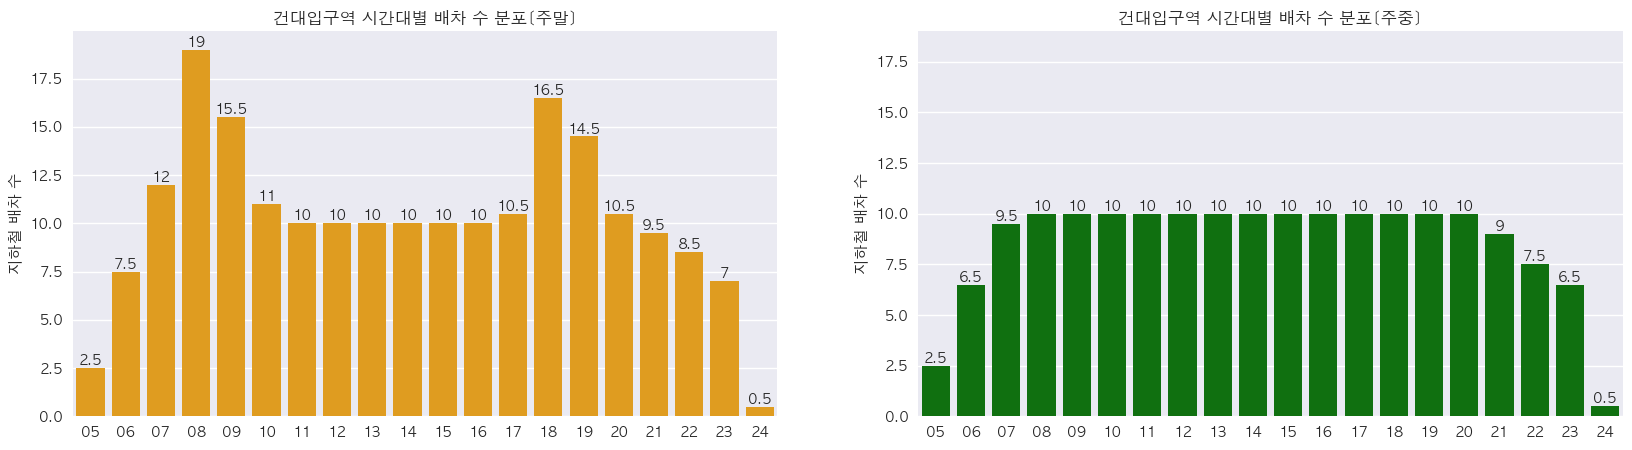

In [10]:

for i in range(0,len(test_[:2]),2):

    Service.stationDispatchBarplot(test_,i, title_columnName='역명',startColNum=9)

> 주중에는 출퇴근 시간인 7시부터 9시까지, 6시부터 8시 까지 배차수가 많다. 11시부터 5시까지는 20대로 일정.       
> 7시 전에는 배차수가 줄어든다.     
> 지하철 배차 분포를 분석하기위해 각 시간대별 배차수 평균과 standard deviation 같은 통계치를 넣은 그래프를 넣고싶다. error bar  

---
#### 전체 학습데이터 생성
- 서울교통공사 역별 일별 시간대별 승하차 인원 정보 2022도 데이터 와 지하철 역정보 테이블을 merge



In [11]:
# Data loading 
subway = pd.read_csv("../Data/교통공사데이터/서울교통공사_역별 일별 시간대별 승하차인원 정보_20221231.csv", encoding='euc-kr')
subway.head()

,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,서울역,승차,120,137,211,439,...,1566,1686,1591,1358,1062,899,1327,814,234,NaN
1,2,2022-01-01,1,150,서울역,하차,113,560,617,910,...,1329,1251,1126,884,764,654,728,416,131,NaN
2,3,2022-01-01,1,151,시청,승차,38,66,101,139,...,474,550,672,528,420,434,491,232,38,NaN
3,4,2022-01-01,1,151,시청,하차,31,195,224,380,...,408,377,354,213,131,98,137,61,24,NaN
4,5,2022-01-01,1,152,종각,승차,44,71,86,158,...,889,964,1024,803,855,1099,1209,255,62,NaN


In [12]:
subway_test= Service.dataInfoProcessing(subway,replace_Nan=True,PrintOutColnumber=10)
mlTable = subway_test
mlTable.head()


1. Data row/colum numbers : 199080/26

2. null ceck 결과 총 82346개의 null 이 있습니다!
   => 25번째.[24시이후]컬럼 :  null 82346 개,	 not null 116734 개

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[연번(int64)]: 			199080/199080 [uniq/raw]
	1.[수송일자(object)]: 			365/199080 [uniq/raw]
	2.[호선(int64)]: 			8/199080 [uniq/raw]
	3.[고유역번호(외부역코드)(object)]: 		558/199080 [uniq/raw]
	4.[역명(object)]: 			244/199080 [uniq/raw]
	5.[승하차구분(object)]: 			2/199080 [uniq/raw]
	6.[06시이전(int64)]: 			1596/199080 [uniq/raw]
	7.[06-07시간대(int64)]: 		2515/199080 [uniq/raw]
	8.[07-08시간대(int64)]: 		6520/199080 [uniq/raw]
	9.[08-09시간대(int64)]: 		10884/199080 [uniq/raw]
	 ...etc (추가로 16개의 칼럼이 있습니다 )


,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,서울역,승차,120,137,211,439,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2,2022-01-01,1,150,서울역,하차,113,560,617,910,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,3,2022-01-01,1,151,시청,승차,38,66,101,139,...,474,550,672,528,420,434,491,232,38,0.0
3,4,2022-01-01,1,151,시청,하차,31,195,224,380,...,408,377,354,213,131,98,137,61,24,0.0
4,5,2022-01-01,1,152,종각,승차,44,71,86,158,...,889,964,1024,803,855,1099,1209,255,62,0.0


--- 
### 칼럼 이름 정제 

In [13]:
mlTable.columns
mlTable.rename({
    "고유역번호(외부역코드)":"역사코드",
    # '06시이전':'05',
    # '06-07시간대':'06',
    # '07-08시간대':'07',
    # '08-09시간대':'08',
    # '09-10시간대':'09',
    # '10-11시간대':'10',
    # '11-12시간대':'11',
    # '12-13시간대':'12',
    # '13-14시간대':'13',
    # '14-15시간대':'14',
    # '15-16시간대':'15',
    # '16-17시간대':'16',
    # '17-18시간대':'17',
    # '18-19시간대':'18',
    # '19-20시간대':'19',
    # '20-21시간대':'20',
    # '21-22시간대':'21',
    # '22-23시간대':'22',
    # '23-24시간대':'23',
    # '24시이후':'24', 
    },inplace =True, axis = 1)



---
#### 수송일자를 기준으로 날짜 변수 feature 화 

In [14]:

mlTable= Service.dayToIntConvert(mlTable, "수송일자")
mlTable = Service.reorder_columns(mlTable,col_name="요일",target_idx=4)
# mlTable.drop('연번', inplace=True, axis=1)
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,06시이전,06-07시간대,07-08시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,474,550,672,528,420,434,491,232,38,0.0
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,408,377,354,213,131,98,137,61,24,0.0
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,889,964,1024,803,855,1099,1209,255,62,0.0


In [15]:
mlTable= Service.date_Divid_Add_YMW_cols(mlTable,'수송일자')
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,06시이전,06-07시간대,07-08시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,년도,월,주차
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1358,1062,899,1327,814,234,0.0,2021,1,52
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,884,764,654,728,416,131,0.0,2021,1,52
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,528,420,434,491,232,38,0.0,2021,1,52
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,213,131,98,137,61,24,0.0,2021,1,52
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,803,855,1099,1209,255,62,0.0,2021,1,52


In [16]:

## 공휴일 데이터 추가 
mlTable= Service.holidaysToIntConvert(mlTable,DateColName='수송일자')
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,06시이전,06-07시간대,07-08시간대,...,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,년도,월,주차,공휴일
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1062,899,1327,814,234,0.0,2021,1,52,0
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,764,654,728,416,131,0.0,2021,1,52,0
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,420,434,491,232,38,0.0,2021,1,52,0
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,131,98,137,61,24,0.0,2021,1,52,0
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,855,1099,1209,255,62,0.0,2021,1,52,0


In [17]:
## 수송일자 , 연번 삭제 시간관련데이터 앞으로 이동 
for idx, col in enumerate(["년도","월","주차","공휴일"]):
    mlTable=Service.reorder_columns(col_name=col,df=mlTable,target_idx=idx)
# mlTable.drop('연번',axis=1, inplace=True)
# mlTable.drop('수송일자',axis=1, inplace=True)
mlTable.head()


,년도,월,주차,공휴일,연번,수송일자,호선,역사코드,요일,역명,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,2021,1,52,0,1,2022-01-01,1,150,6,서울역,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2021,1,52,0,2,2022-01-01,1,150,6,서울역,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,2021,1,52,0,3,2022-01-01,1,151,6,시청,...,474,550,672,528,420,434,491,232,38,0.0
3,2021,1,52,0,4,2022-01-01,1,151,6,시청,...,408,377,354,213,131,98,137,61,24,0.0
4,2021,1,52,0,5,2022-01-01,1,152,6,종각,...,889,964,1024,803,855,1099,1209,255,62,0.0


In [18]:
## 요일 데이터를 통해 주중 주말 여부를 판단하고 칼럼에 추가 
mlTable['주중주말'] = ['SAT' if day in [5, 6] else 'DAY' for day in mlTable['요일']]
mlTable.head()

,년도,월,주차,공휴일,연번,수송일자,호선,역사코드,요일,역명,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,주중주말
0,2021,1,52,0,1,2022-01-01,1,150,6,서울역,...,1686,1591,1358,1062,899,1327,814,234,0.0,SAT
1,2021,1,52,0,2,2022-01-01,1,150,6,서울역,...,1251,1126,884,764,654,728,416,131,0.0,SAT
2,2021,1,52,0,3,2022-01-01,1,151,6,시청,...,550,672,528,420,434,491,232,38,0.0,SAT
3,2021,1,52,0,4,2022-01-01,1,151,6,시청,...,377,354,213,131,98,137,61,24,0.0,SAT
4,2021,1,52,0,5,2022-01-01,1,152,6,종각,...,964,1024,803,855,1099,1209,255,62,0.0,SAT


In [19]:

mlTable_승차 = mlTable[mlTable['승하차구분']=='승차']
mlTable_하차 = mlTable[mlTable['승하차구분']=='하차']
mlTable_승차.head()

,년도,월,주차,공휴일,연번,수송일자,호선,역사코드,요일,역명,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,주중주말
0,2021,1,52,0,1,2022-01-01,1,150,6,서울역,...,1686,1591,1358,1062,899,1327,814,234,0.0,SAT
2,2021,1,52,0,3,2022-01-01,1,151,6,시청,...,550,672,528,420,434,491,232,38,0.0,SAT
4,2021,1,52,0,5,2022-01-01,1,152,6,종각,...,964,1024,803,855,1099,1209,255,62,0.0,SAT
6,2021,1,52,0,7,2022-01-01,1,153,6,종로3가,...,1178,1028,861,705,871,1160,324,69,0.0,SAT
8,2021,1,52,0,9,2022-01-01,1,154,6,종로5가,...,938,818,620,510,479,477,107,22,0.0,SAT


---
### 현재 7호선만 배차 테이블이 있다. 
mlTable 을 7호선 만 추출 후 merge

In [20]:
mlt7= mlTable[mlTable['호선']==7]

test_.drop('역명',axis=1,inplace=True)
test_.drop('승하차구분',axis=1,inplace=True)
mlt7_stInfo_merged= pd.merge(test_,mlt7,on = ['역사코드','주중주말'])
# 배차 테이블 check
mlt7_stInfo_merged.columns

KeyError: "['승하차구분'] not found in axis"

In [ ]:

mlt7_stInfo_merged.rename({
    "고유역번호(외부역코드)":"역사코드",
    '06시이전':'05시인원',
    '06-07시간대':'06시인원',
    '07-08시간대':'07시인원',
    '08-09시간대':'08시인원',
    '09-10시간대':'09시인원',
    '10-11시간대':'10시인원',
    '11-12시간대':'11시인원',
    '12-13시간대':'12시인원',
    '13-14시간대':'13시인원',
    '14-15시간대':'14시인원',
    '15-16시간대':'15시인원',
    '16-17시간대':'16시인원',
    '17-18시간대':'17시인원',
    '18-19시간대':'18시인원',
    '19-20시간대':'19시인원',
    '20-21시간대':'20시인원',
    '21-22시간대':'21시인원',
    '22-23시간대':'22시인원',
    '23-24시간대':'23시인원',
    '24시이후':'24시인원', 
    '05':'05배차',
    '06':'06배차',
    '07':'07배차',
    '08':'08배차',
    '09':'09배차',
    '10':'10배차',
    '11':'11배차',
    '12':'12배차',
    '13':'13배차',
    '14':'14배차',
    '15':'15배차',
    '16':'16배차',
    '17':'17배차',
    '18':'18배차',
    '19':'19배차',
    '20':'20배차',
    '21':'21배차',
    '22':'22배차',
    '23':'23배차', 
    '24':'24배차',
    },inplace =True, axis = 1)


In [ ]:
mlt7_stInfo_merged.columns

Index(['역사코드', '역_이름코드', '주중', '주말', 'latitude', 'longitude', '주중주말', '05배차',
       '06배차', '07배차', '08배차', '09배차', '10배차', '11배차', '12배차', '13배차', '14배차',
       '15배차', '16배차', '17배차', '18배차', '19배차', '20배차', '21배차', '22배차', '23배차',
       '24배차', '년도', '월', '주차', '공휴일', '연번', '수송일자', '호선', '요일', '역명', '승하차구분',
       '05시인원', '06시인원', '07시인원', '08시인원', '09시인원', '10시인원', '11시인원', '12시인원',
       '13시인원', '14시인원', '15시인원', '16시인원', '17시인원', '18시인원', '19시인원', '20시인원',
       '21시인원', '22시인원', '23시인원', '24시인원'],
      dtype='object')

In [ ]:
colnames_arry =[ '년도', '월', '주차', '공휴일', '연번', '수송일자', '호선', '요일', '역명', '승하차구분']
for idx, col in enumerate(colnames_arry):
    mlt7_stInfo_merged=Service.reorder_columns(mlt7_stInfo_merged, col_name=col,target_idx= idx)
mlt7_stInfo_merged.columns

Index(['년도', '월', '주차', '공휴일', '연번', '수송일자', '호선', '요일', '역명', '승하차구분', '역사코드',
       '역_이름코드', '주중', '주말', 'latitude', 'longitude', '주중주말', '05배차', '06배차',
       '07배차', '08배차', '09배차', '10배차', '11배차', '12배차', '13배차', '14배차', '15배차',
       '16배차', '17배차', '18배차', '19배차', '20배차', '21배차', '22배차', '23배차', '24배차',
       '05시인원', '06시인원', '07시인원', '08시인원', '09시인원', '10시인원', '11시인원', '12시인원',
       '13시인원', '14시인원', '15시인원', '16시인원', '17시인원', '18시인원', '19시인원', '20시인원',
       '21시인원', '22시인원', '23시인원', '24시인원'],
      dtype='object')

In [ ]:


mlTable=mlt7_stInfo_merged
mlTable.drop('주중주말', axis=1, inplace=True)
mlTable.drop('수송일자', axis=1, inplace=True)
mlTable.drop('년도', axis=1, inplace=True)
mlTable_승차 = mlTable[mlTable['승하차구분']=='승차']
mlTable_하차 = mlTable[mlTable['승하차구분']=='하차']
mlTable_승차.head()

,월,주차,공휴일,연번,호선,요일,역명,승하차구분,역사코드,역_이름코드,...,15시인원,16시인원,17시인원,18시인원,19시인원,20시인원,21시인원,22시인원,23시인원,24시인원
0,1,52,1,969,7,0,장암,승차,2711,장암_2711,...,102,111,118,60,43,28,17,7,5,0.0
2,1,1,1,1513,7,1,장암,승차,2711,장암_2711,...,55,77,82,84,31,24,17,8,3,0.0
4,1,1,1,2059,7,2,장암,승차,2711,장암_2711,...,67,110,104,68,39,25,26,17,6,0.0
6,1,1,1,2607,7,3,장암,승차,2711,장암_2711,...,80,73,104,74,37,29,25,4,4,0.0
8,1,1,1,3151,7,4,장암,승차,2711,장암_2711,...,62,91,104,69,62,24,22,3,2,0.0


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

# # 가상의 데이터셋 예시
# # 데이터를 로드하고 필요한 열을 선택합니다.
# # data_column: 요일, 년도, 월, 주차, 공휴일여부
# # test_column: 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24

# # 데이터 로드
# data_column = ['요일', '년도', '월', '주차', '공휴일여부']
# test_column = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

# data = subway_7호선_도봉산_승차2[data_column]
# target = subway_7호선_도봉산_승차2[test_column]

# train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)


In [ ]:
input_column=['월', '주차', '공휴일', '요일', '역사코드', '주중', '주말',
    'latitude', 'longitude', '05배차', '06배차', '07배차', '08배차', '09배차', '10배차',
    '11배차', '12배차', '13배차', '14배차', '15배차', '16배차', '17배차', '18배차', '19배차',
    '20배차', '21배차', '22배차', '23배차', '24배차']
target_column=['05시인원', '06시인원', '07시인원',
    '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원', '15시인원',
    '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원', '23시인원',
    '24시인원']


training_table = mlTable_승차[input_column]
target_table = mlTable_승차[target_column]

In [ ]:

training_table_하차 = mlTable_하차[input_column]
target_table_하차 = mlTable_하차[target_column]

In [ ]:
training_table_하차.head()
target_table_하차.head()

,05시인원,06시인원,07시인원,08시인원,09시인원,10시인원,11시인원,12시인원,13시인원,14시인원,15시인원,16시인원,17시인원,18시인원,19시인원,20시인원,21시인원,22시인원,23시인원,24시인원
1,2,9,20,34,64,72,38,55,49,42,41,26,28,28,26,10,10,16,5,0.0
3,4,33,35,48,44,48,43,53,34,25,24,44,47,89,117,64,41,22,14,0.0
5,2,30,39,49,31,44,59,41,48,42,32,42,45,93,114,63,46,32,15,0.0
7,5,33,44,54,52,42,63,47,26,32,35,29,54,113,107,70,44,21,14,0.0
9,7,35,45,52,31,48,60,42,49,55,29,51,44,94,107,57,42,21,7,0.0


In [ ]:


Service.MultiOutputRegressorFunc(training_table, target_table)



Model score: 0.7934133162381896
[[ 332.   745.6 1668.  1543.8  875.6  575.8  524.2  535.   520.4  539.
   522.8  537.4  543.4  603.6  350.2  228.4  185.8  123.2   52.8    8.4]
 [ 161.2  267.6  723.2 1071.2  587.4  322.2  332.6  330.6  301.6  300.4
   339.4  464.8  491.   847.4  336.6  272.6  233.4  190.8   78.8   13.6]
 [ 138.2  523.  1439.4 1139.8  575.4  392.6  376.4  391.8  390.4  430.8
   494.8  549.   482.4  427.   202.   111.6   93.6   74.6   22.8    0. ]
 [ 245.6  451.4  987.6 1333.2  872.2  638.2  577.6  616.8  599.2  557.6
   570.4  620.6  625.6  567.4  391.4  278.4  261.   231.2  119.    20.6]
 [  55.8  238.4  677.6  441.6  119.8   59.2   53.4   60.4   53.4   52.4
    59.2   92.8   93.8   80.2   33.4   27.    24.2    9.6    3.2    0. ]]


In [ ]:
Service.MultiOutputRegressorFunc(training_table_하차, target_table_하차)

Model score: 0.8099246587986736
[[  27.6  170.2  273.4  549.6  479.   435.6  479.2  494.2  416.6  414.2
   528.8  673.8  899.4 1425.2 1562.6  781.4  597.6  518.6  322.8  116. ]
 [  30.2  134.2  450.4 1154.6  394.   285.4  248.8  266.8  283.2  276.
   314.2  358.2  545.4  956.2  714.6  418.4  347.4  301.6  178.6   77.6]
 [  23.4  169.   247.8  451.4  676.8  695.   523.   485.   458.4  409.
   428.8  511.4  650.4  907.6 1235.6  670.8  556.4  479.4  385.2    0. ]
 [  33.   150.   225.6  488.8  349.6  333.6  393.   433.6  501.6  567.8
   674.6  851.2  956.8 1271.   932.2  621.4  621.   570.2  369.6  127.6]
 [   5.6   35.    46.    46.6   38.6   34.8   50.2   43.2   31.8   36.2
    30.8   35.6   44.2   95.   106.4   55.2   41.6   28.8    9.4    0. ]]


In [ ]:
mlTable_승차.to_csv("../Data/FinalDataset/mlTable_승차.csv", index=None)
mlTable_하차.to_csv("../Data/FinalDataset/mlTable_하차.csv", index=None)

